<a href="https://colab.research.google.com/github/Harshita0201/Machine_Learning/blob/main/2_3Polynomial_regression.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Polynomial Regression

## Importing the libraries

In [2]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

## Importing the dataset

In [4]:
dataset = pd.read_csv('Position_Salaries.csv')
X = dataset.iloc[:, 1:-1].values # for the given dataset not including the first column as it col 1 vals are interpretation from col 0, or col 0 is encoded in col 1 vals 
y = dataset.iloc[:, -1].values  

In [5]:
print(X)

[[ 1]
 [ 2]
 [ 3]
 [ 4]
 [ 5]
 [ 6]
 [ 7]
 [ 8]
 [ 9]
 [10]]


In [6]:
print(y)

[  45000   50000   60000   80000  110000  150000  200000  300000  500000
 1000000]


For the given datset we have very less number of entries due to ehich we will not seperate it into training and test sets and continue with training the model on whole dataset

## Training the Linear Regression model on the whole dataset

In [7]:
#For y = b0 + b1*x1  
from sklearn.linear_model import LinearRegression
lin_reg = LinearRegression()
lin_reg.fit(X, y) #fitting the model on the whole dataset


LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

## Training the Polynomial Regression model on the whole dataset

In [12]:
#For y = b0 + b1*x1 + b2*x1^2 + b3*x1^3...bn*x1^n
#To implement this we are going to do in 2 steps
#step 1-> create a matrix of powers of features i.e-> x1, x1^2, x1^3...x1^n

#to create the new matrix of pwers of IVs we use PolynomialFeatures class under the preprossessing module under the sklearn lib
from sklearn.preprocessing import PolynomialFeatures
poly_reg = PolynomialFeatures(degree = 4) #for n=4 i,e b0 + b1*x1 + b2*x1^2 + b3*x1^3 + b4*x1^4
X_poly = poly_reg.fit_transform(X) #new matrix of powered features

#step 2-> integrate this to a linear regression model(to make polynomial linear regression)
lin_reg2 = LinearRegression()
lin_reg2.fit(X_poly, y) #fit the model on new powered matrix features (IV) and same Dv
#this completes creation of polynomial linear regression model

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

## Visualising the Linear Regression results

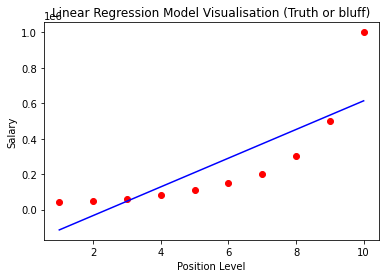

In [10]:
plt.scatter(X, y, color='red') #plotting the real values of X (IV) and y (DV)
plt.plot(X, lin_reg.predict(X), color='blue') #plotting the predicted values(DV i.e Salary) for given IV posistions
plt.title('Linear Regression Model Visualisation (Truth or bluff)')
plt.xlabel('Position Level')
plt.ylabel('Salary')
plt.show()

we can make out from the above graogh that linear regression model is not well adopted for non linear given feature variables (as for many values of given position level (IV) the prediction of model is far from the real value pf salary (red plot)

## Visualising the Polynomial Regression results

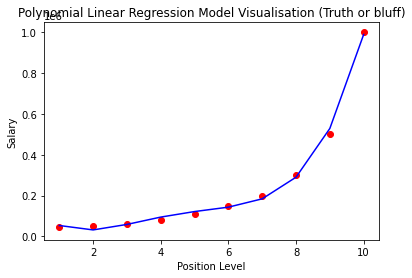

In [13]:
plt.scatter(X, y, color='red') #plotting the real values of X (IV) and y (DV)
plt.plot(X, lin_reg2.predict(poly_reg.fit_transform(X)), color='blue') #plotting the predicted values(DV i.e Salary) for given IV (powered features)posistions
plt.title('Polynomial Linear Regression Model Visualisation (Truth or bluff)')
plt.xlabel('Position Level')
plt.ylabel('Salary')
plt.show()

We keep on increasing the n (fromn=2, to 3 to 4..)and retrain the polynomial reg model for better results.
The results of the graph are of over-fitting (definately) but this shows us that ploynomial linear regression fites better to such a dataset with non linear dependencies btw IV and DV.

## Visualising the Polynomial Regression results (for higher resolution and smoother curve)

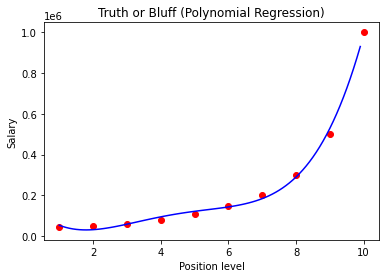

In [15]:
X_grid = np.arange(min(X), max(X), 0.1) #instead of taking scale of 1 on x-axis we take scale of 0.1 
X_grid = X_grid.reshape((len(X_grid), 1))
plt.scatter(X, y, color = 'red')
plt.plot(X_grid, lin_reg2.predict(poly_reg.fit_transform(X_grid)), color = 'blue')
plt.title('Truth or Bluff (Polynomial Regression)')
plt.xlabel('Position level')
plt.ylabel('Salary')
plt.show()

## Predicting a new result with Linear Regression

In [16]:
#predicting for Position level 6.5
lin_reg.predict([[6.5]]) #passing val inside double square brackets as predict() accepts  params passed as 2D array

array([330378.78787879])

Bad prediction (more than the actual salary for that position level)

## Predicting a new result with Polynomial Regression

In [17]:
lin_reg2.predict(poly_reg.fit_transform([[6.5]]))

array([158862.45265155])

Close prediction to the actual salary mentioned.